https://www.tensorflow.org/tutorials/keras/classification

In [2]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.1.0


In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


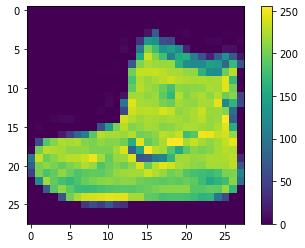

In [4]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [5]:
train_images = train_images / 255.0

test_images = test_images / 255.0

#we divide by 255 to make sure the values of pixels range between 0-1

In [6]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), #transforms images from 28x28 to 1d array of 748
    keras.layers.Dense(128, activation='relu'), # densley connected layer
    keras.layers.Dense(10)
])

- Loss function —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
- Optimizer —This is how the model is updated based on the data it sees and its loss function.
- Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [7]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [8]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.4987 - accuracy: 0.8240
Epoch 2/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.3737 - accuracy: 0.8640
Epoch 3/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.3370 - accuracy: 0.8761
Epoch 4/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.3144 - accuracy: 0.8832
Epoch 5/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.2962 - accuracy: 0.8912
Epoch 6/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.2799 - accuracy: 0.8971
Epoch 7/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.2684 - accuracy: 0.9010
Epoch 8/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.2594 - accuracy: 0.9035
Epoch 9/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.2486 - accuracy: 0.9077
Epoch 10/10
60

In [11]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

#since the accuracy on the test was a little less, we are probably overfitting

10000/10000 - 0s - loss: 0.3524 - accuracy: 0.8736

Test accuracy: 0.8736


In [13]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
# the original model outputs log-odds, we need to convert those to probabilities

In [14]:
predictions = probability_model.predict(test_images)

In [15]:
predictions[0]

array([1.4792615e-06, 6.8047612e-09, 2.7003592e-08, 3.8984847e-11,
       6.5310322e-09, 8.6151162e-04, 3.0209617e-06, 3.3941150e-02,
       1.6705894e-06, 9.6519107e-01], dtype=float32)

In [16]:
np.argmax(predictions[0])

9

In [17]:
test_labels[0]

9